In [44]:
import os
import os.path as op
import json
import matplotlib.image as mp
import matplotlib.pyplot as plt

In [45]:
path = 'train\\00194\\02\\Images\\fusion\\'
wrl_path = op.join(path,'fusion.wrl')
obj_path = op.join(path,'nicp.obj')
img_path = op.join(path,'fusion.jpg')
pts_path = op.join(path,'nicp_106_pts.txt')

In [23]:
a = '-1'
aa = 'adasd'
print(is_float_seq([a,a,a]))

True


143733 143733 537524
['-5.667709', '-40.37088', '716.327209'] ['0.524479', '0.494444'] ['10', '36', '2', '-1']
53215 105840
[-0.65580512, 0.41872805, 0.89348682] [2.0, 131.0, 1.0]
106 [-0.88442919, 0.16465527, 0.23097541]


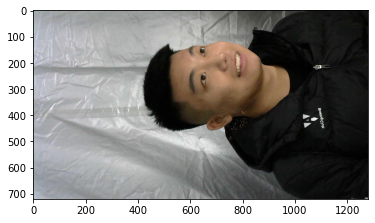

In [54]:
def is_float_seq(tokens):
    for token in tokens:
        try:
            float(token)
        except:
            return False
    return True

def pts_reader(path):
    with open(path,'r') as f:
        lines = f.readlines()
    points = list()
    
    for line in lines:
        tokens = line.strip().split()
        points.append([float(x) for x in tokens])
    print(len(points),points[0])
    return points

def obj_reader(path):
    with open(path,'r') as f:
        lines = f.readlines()
        
    vertices, conn = list(), list()
    for line in lines:
        tokens = line.strip().split()
        if len(tokens)==7:
            vertices.append([float(x) for x in tokens[1:4]])
        elif len(tokens)==4:
            conn.append([float(x) for x in tokens[1:]])
    
    print(len(vertices),len(conn))
    print(vertices[0],conn[0])
    return vertices, conn

def wrl_reader(path):
    with open(path,'r') as f:
        lines = f.readlines()
    points, tex, conn = list(), list(), list()
    for line in lines:
        tokens = [t.strip(',') for t in line.strip().split()]
        if len(tokens)<2 or not is_float_seq(tokens):
            continue
        elif len(tokens)==3:
            points.append(tokens)
        elif len(tokens)==2:
            tex.append(tokens)
        elif len(tokens)==4:
            conn.append(tokens)
    print(len(points),len(tex),len(conn))
    print(points[0],tex[0],conn[0])
    return points,tex,conn

def img_loader(path):
    img_fusion = mpim.imread(path)
    imgs = []
    for i in range(len(img_fusion[0])//1280):
        imgs.append(img_fusion[:,1280*i:1280*i+1280])
    return imgs
    
imgs_rt = img_loader(img_path)
wrl_rt = wrl_reader(wrl_path)
obj_rt = obj_reader(obj_path)
pts_rt = pts_reader(pts_path)